# Churn Data Analysis In Telecommunications

Source: https://www.kaggle.com/becksddf/churn-in-telecoms-dataset 


Initially, we install all the required libraries.

In [1]:
!pip install missingno
from scipy import stats
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.pyplot import pie, axis, show


Then, we load the csv file into a dataframe 'df'.

In [2]:
df = pd.read_csv("churndata.csv")

df.head is used to load the first ten rows of the dataframe.

In [3]:
df.head(10)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


df.describe() is used to analyze the characeristics of the columns in the dataframe.

In [4]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


df.info() is used to observe the datatypes of the columns in the dataset. From this we can observe that there are 8 float columns, 8 int columns, 4 object columns and 1 bool type column.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                     3333 non-null object
account length            3333 non-null int64
area code                 3333 non-null int64
phone number              3333 non-null object
international plan        3333 non-null object
voice mail plan           3333 non-null object
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64

In [6]:
df.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

Here, the data type of the area code is initially int. But, we are changing the data type of area code column to object as area code should be unique.
Then, we are converting churn column data type into int.

In [48]:
df['area code'] = df['area code'].astype('object')
df['churn']=df['churn'].astype('int')
df['international plan'] = df['international plan'].astype('category')




Here, we are checking for the unique values.

In [49]:
df.describe(include=['O'])

,state,area code,phone number,voice mail plan
count,3333,3333,3333,3333
unique,51,3,3333,2
top,WV,415,349-3732,no
freq,106,1655,1,2411


Here, we are dropping the phone number column as the phone number for each user is unique and is not relevant for our analysis on the churn.

In [50]:
df.drop(["phone number"], axis = 1,)

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
5,AL,118,510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0
6,MA,121,510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0
7,MO,147,415,yes,no,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,0
8,LA,117,408,no,no,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0
9,WV,141,415,yes,yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0


# Data Cleaning

By using df.isnull().sum(), we are checking for any null values in the dataframe. From this, we can observe that there are no null values present in the dataframe.

In [51]:
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

The above analysis is shown in the form of a graph below.

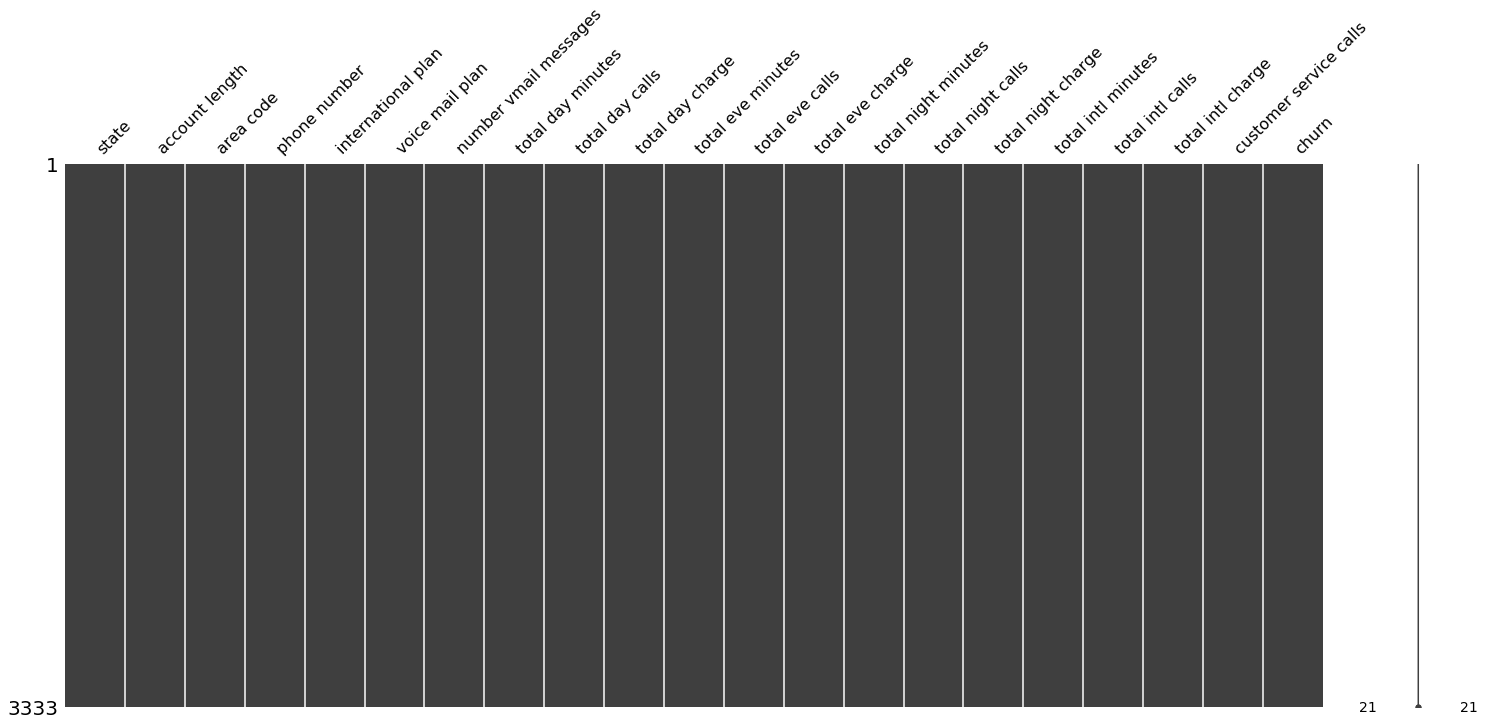

In [52]:
import missingno as msno
msno.matrix(df)

We can observe that there are no null values

# Analyzing TARGET Column and Various Features

We are using value_counts() to find out the count for each unique value in the churn. We can observe that the rate of people who are trying to churn is less.

In [53]:
df.churn.value_counts()

0    2850
1     483
Name: churn, dtype: int64

Here, we are calculating the churn percentage and we can observe that the total churn percentage of tth dataframe is 14.491%.

In [54]:
churn_percentage = df["churn"].sum() * 100 / df["churn"].shape[0]
print("Churn percentage is %.3f%%." % churn_percentage)

Churn percentage is 14.491%.


We are plotting a bar plot to analyze the churn rate. We can observe that there are only few people trying to churn and maximum customers are not planning to churn.

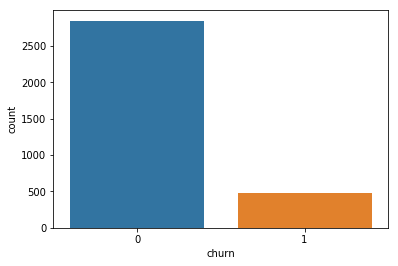

In [55]:
a=sns.countplot(x='churn',data=df)

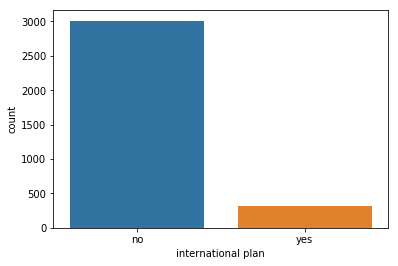

In [56]:
a=sns.countplot(x='international plan',data=df)

# Correlation between Various Columns
 Here, we are plotting a correlation map to analyze the correlation between columns.

In [57]:
!pip install plotly
import plotly
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from plotly.offline import plot, iplot

In [58]:
cr = df.corr()
trace = go.Heatmap(z=cr.values.tolist(), x=cr.columns, y=cr.columns)
data=[trace]
layout = go.Layout(
    title='Visualization for pairwise correlation of the columns',
    width=1100,
    height=800,
    yaxis=go.layout.YAxis(automargin=True),
    xaxis=dict(tickangle=50),
    margin=go.layout.Margin(l=0, r=300, b=300, t=90)
)



fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='heatmap1')

From the above map, we can see that churn has highest correlation with columns total day charge, total day minutes, total eve charge, total eve minutes, total night charge, total night minutes,total intl charge and total intl minutes.

The columns that have highest correlation with the churn variable are the total_day_charge, the total_day_minutes and the number of customer service calls.

MULTICOLLINEAR VARIABLES Night Mins , Night Charge 0.999999

Eve Charge , Eve Mins 1.000000

Day Charge , Day Mins 1.000000

Intl Charge , Intl Mins 0.999993

Here, we are using groupby on churn to group data with other columns and then we are using mean() to find out their mean. We can observe that the mean of total day minutes with respect to churn is highest among all the others.

In [59]:
df.groupby(['churn']).mean()

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
churn,,,,,,,,,,,,,,,
0,100.793684,8.604561,175.175754,100.283158,29.780421,199.043298,100.038596,16.918909,200.133193,100.058246,9.006074,10.158877,4.532982,2.743404,1.449825
1,102.664596,5.115942,206.914079,101.335404,35.175921,212.410145,100.561077,18.054969,205.231677,100.399586,9.235528,10.700000,4.163561,2.889545,2.229814


Here, we plotting a graph to analyze the churn rate with respect to total day charge column.

Text(0.5, 0, 'TOTAL DAY CHARGE vs CHURN RATE')

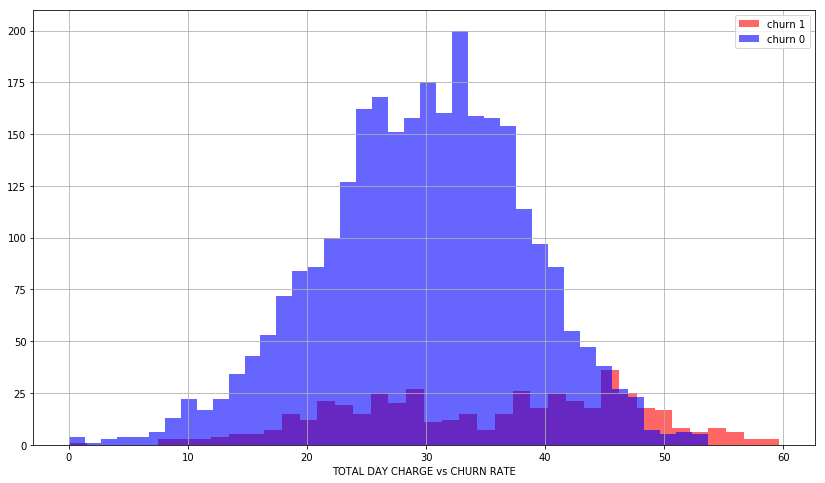

In [60]:
plt.figure(figsize=(14,8))
df[df['churn']==1]['total day charge'].hist(bins=40,color = 'red',label = 'churn 1',alpha = 0.6)
df[df['churn']==0]['total day charge'].hist(bins = 40,color = 'blue',label = 'churn 0',alpha = 0.6)
plt.legend()
plt.xlabel('TOTAL DAY CHARGE vs CHURN RATE')

From the above graph, we can observe that the rate of churn is high in customers with high day charges.

Then, we are plotting another visualization to analyze the churn rate with respect to customer service calls.

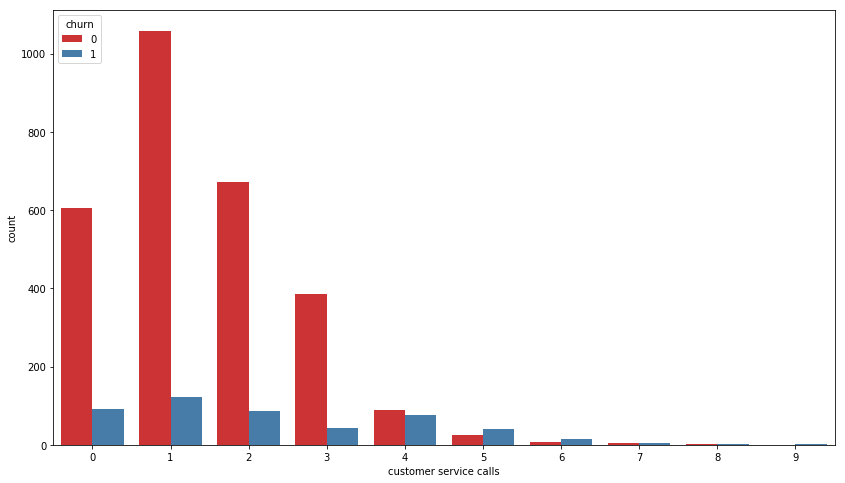

In [61]:
plt.figure(figsize=(14,8))
sns.countplot(x='customer service calls',hue = 'churn',data=df,palette='Set1' )

From the above graph, we can observe that churn is directly proportional to customer service calls. That is, churn is increasing with increase in customer service calls.

Here, we are plotting churn with international plan attribute to analyze the churn rate with respect to international plan factor.

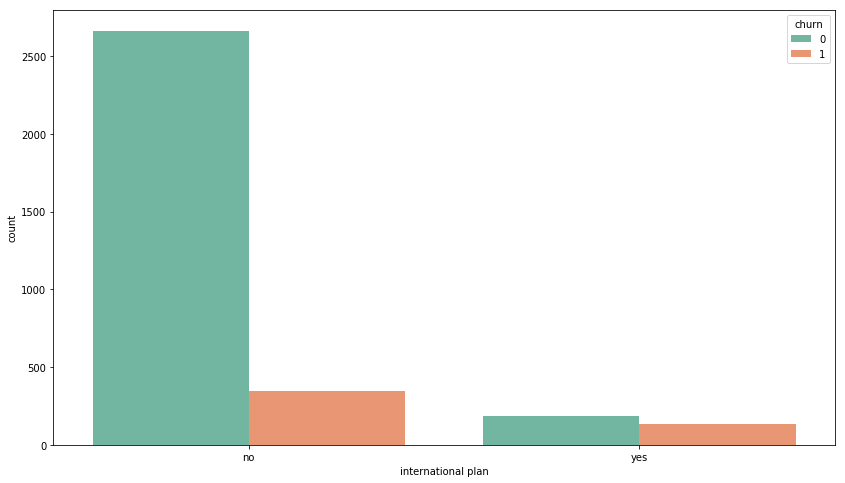

In [67]:
plt.figure(figsize=(14,8))
sns.countplot(x ='international plan',hue='churn',data = df,palette='Set2')

From the above plot, we can observe that the churn rate is high for customers with international plan when compared to customers with no international plan. 

# Checking and clipping outliers

Now that we analyzed the correlating factors, let us check for the outliers in the respective columns.

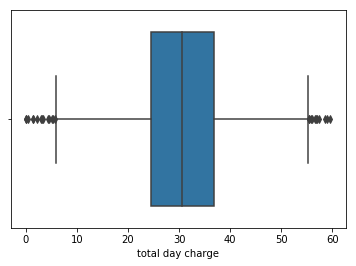

In [68]:
sns.boxplot(df['total day charge'])

From the above plot, we can observe that range of diversity is extreme. That is, even though more data points lie in the average range, there are few datapoints that are at the extreme corners which has an effect on the analysis. Hence, we are removing the outliers to get better results in the analysis.

In [69]:
print(df['total day charge'].quantile(0.99))
print(df['total day charge'].quantile(0.01))

51.876799999999996
8.8132


We are plotting the above alterations here by clipping the boundaries.

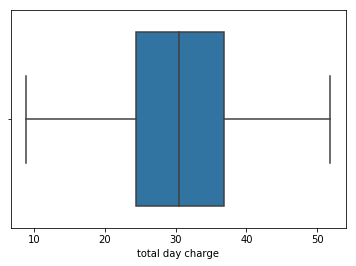

In [70]:
df['total day charge'].clip(lower =8.81,upper = 51.87,inplace = True)
sns.boxplot(df['total day charge'])

After removing the outliers, analysis can be better.

After plotting total day minutes, we can observe that the majority datapoints are in the middle but there are outliers that are at extremes. Hence, we are removing the outliers.

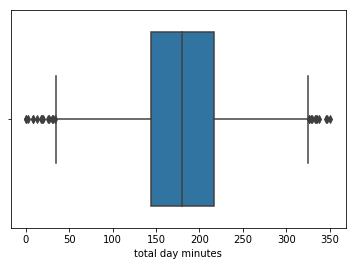

In [71]:
sns.boxplot(df['total day minutes'])

In [72]:
print(df['total day minutes'].quantile(0.99))
print(df['total day minutes'].quantile(0.01))

305.168
51.831999999999994


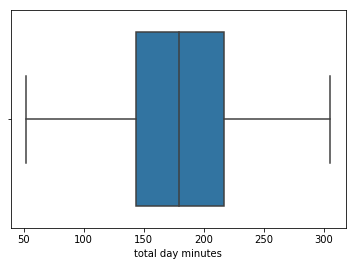

In [73]:
df['total day minutes'].clip(lower =51.83,upper = 305.168,inplace = True)
sns.boxplot(df['total day minutes'])

The plot range is reduced here to remove the outliers after calculating the average starting and ending range of the plot being 50 and 300 for better analysis results.

We are perfoming the same process of identifying and removing the outliers on total eve charge column.

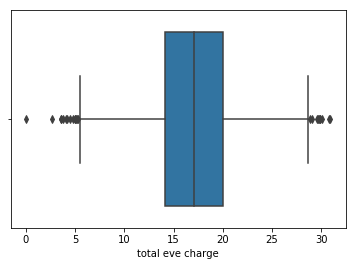

In [74]:
sns.boxplot(df['total eve charge'])

In [75]:
print(df['total eve charge'].quantile(0.99))
print(df['total eve charge'].quantile(0.01))

27.113599999999998
6.7592


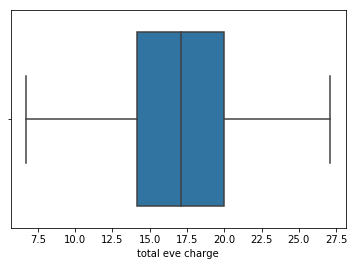

In [76]:
df['total eve charge'].clip(lower =6.7,upper = 27.113,inplace = True)
sns.boxplot(df['total eve charge'])

After calculating, we can observe that the boundaries are reformed to 7.5 and 27.5 as the extreme data points are removed and average is calculated to be 6.7 and 27.1.

The same process is applied, outliers are identified and clipped after calculating for total eve minutes column.

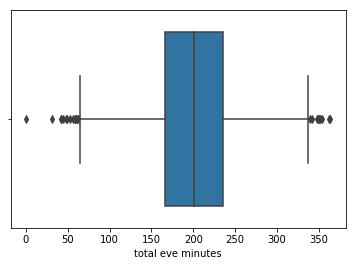

In [77]:
sns.boxplot(df['total eve minutes'])

In [78]:
print(df['total eve minutes'].quantile(0.99))
print(df['total eve minutes'].quantile(0.01))

318.936
79.524


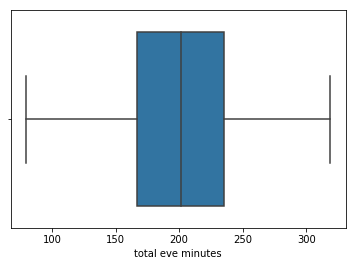

In [79]:
df['total eve minutes'].clip(lower =79.524,upper = 318.936,inplace = True)
sns.boxplot(df['total eve minutes'])

The same process is applied, outliers are identified and clipped after calculating for total intl minutes column.

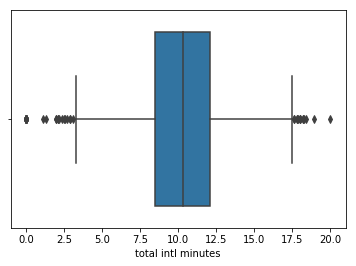

In [80]:
sns.boxplot(df['total intl minutes'])

In [81]:
print(df['total intl minutes'].quantile(0.99))
print(df['total intl minutes'].quantile(0.01))

16.667999999999985
3.332


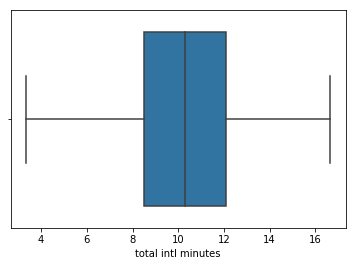

In [82]:
df['total intl minutes'].clip(lower =3.332,upper = 16.66,inplace = True)
sns.boxplot(df['total intl minutes'])

The same process is applied, outliers are identified and clipped after calculating for total intl charge column.

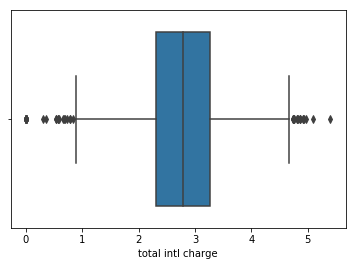

In [83]:
sns.boxplot(df['total intl charge'])

In [84]:
print(df['total intl charge'].quantile(0.99))
print(df['total intl charge'].quantile(0.01))

4.5003999999999955
0.8996


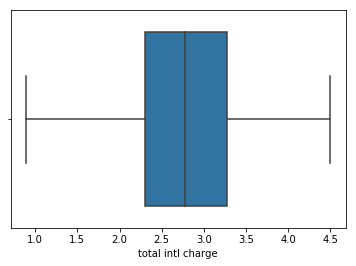

In [85]:
df['total intl charge'].clip(lower =0.89,upper = 4.50,inplace = True)
sns.boxplot(df['total intl charge'])

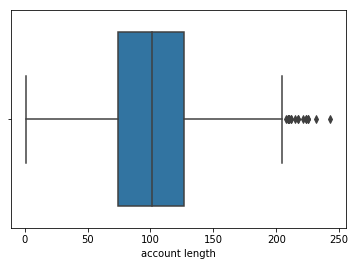

In [86]:
sns.boxplot(df['account length'])

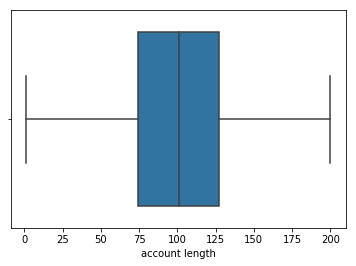

In [87]:
df['account length'].clip(upper = 200,inplace = True)
sns.boxplot(df['account length'])

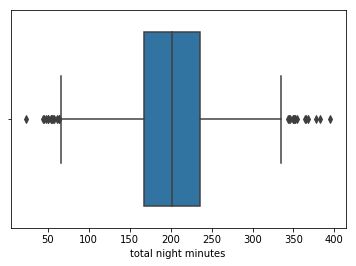

In [88]:
sns.boxplot(df['total night minutes'])

In [89]:
print(df['total night minutes'].quantile(0.99))
print(df['total night minutes'].quantile(0.01))

317.4479999999998
79.428


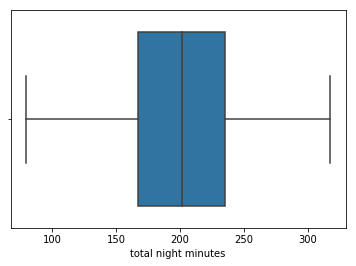

In [90]:
df['total night minutes'].clip(lower =79.428,upper = 317.44,inplace = True)
sns.boxplot(df['total night minutes'])

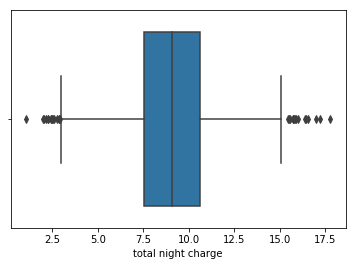

In [91]:
sns.boxplot(df['total night charge'])

In [92]:
print(df['total night charge'].quantile(0.99))
print(df['total night charge'].quantile(0.01))

14.283999999999992
3.5764


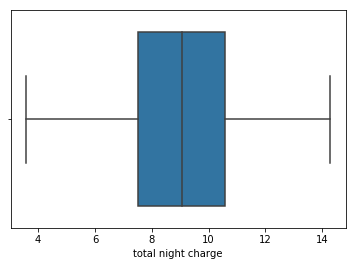

In [93]:
df['total night charge'].clip(lower =3.57,upper =14.28 ,inplace = True)
sns.boxplot(df['total night charge'])